In [31]:
from scipy.io import wavfile 
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import numpy as np

import os
import librosa
import math


NOTE_NAMES = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]



y, fs = librosa.load("scale.wav", sr=None)

y = librosa.to_mono(y)


FPS = 30
FRAME_STEP = fs / FPS 

print(f"Sound clip is {len(y)/fs} seconds long")
print(fs)
window_size = int(fs* 0.25)

print(window_size)

# f0 = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
# print(f0)

Sound clip is 9.195102040816327 seconds long
44100
11025


2558.5754695354544


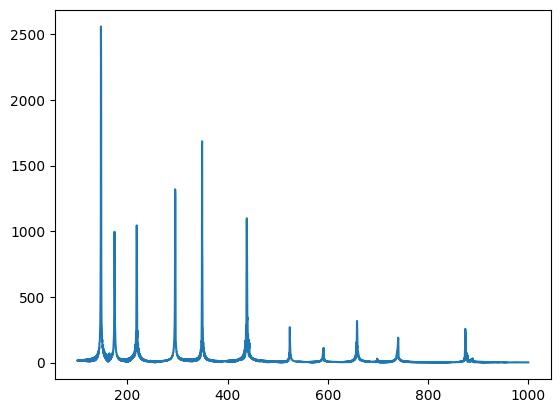

In [19]:
fft_frequencies = np.fft.rfftfreq(len(y), 1/fs)
sound_fft = np.fft.rfft(y)  
print(np.max(np.abs(sound_fft)))
plt.plot(np.where((fft_frequencies > 100) & (fft_frequencies < 1000), fft_frequencies, None) , np.abs(sound_fft))

In [20]:
fft_frequencies = np.fft.rfftfreq(window_size, 1/fs)

def get_window_sample(track, current_frame):
    next_window = current_frame + window_size
    return track[current_frame:next_window]




for sample in range(0, len(y), int(window_size/4)): 
    window_track = get_window_sample(y, sample)
    fft = np.fft.rfft(window_track)
    # fft = np.abs(fft)   

    for idx in range(len(fft)):
        freq = fft_frequencies[idx]
        amplitude = np.abs(fft[idx])
        if amplitude > 400:
            print(f" frequency = {librosa.hz_to_note(freq)}, amplitude = {amplitude}")
        # print(freq)
    # print(len(lst))
    # a_max = max(np.max(fft))


 frequency = D3, amplitude = 446.04113891271413
 frequency = D3, amplitude = 459.151646356146
 frequency = D3, amplitude = 443.8885730248903
 frequency = D3, amplitude = 427.9096412317257
 frequency = D3, amplitude = 414.6858089211093
 frequency = D3, amplitude = 400.80402704149014


In [33]:
onset_frames = librosa.onset.onset_detect(y)
print(onset_frames)
onset_times = librosa.frames_to_time(onset_frames)
onset_samples = librosa.frames_to_samples(onset_frames)

print(onset_samples)

with open("notes.txt", 'wt') as f:
    for onset_time in onset_times:
        f.write(f"{onset_time} \n")


notes = []


# for sample in onset_samples:
#     window_track = get_window_sample(y, sample-20)
#     fft = np.fft.rfft(window_track)
#     # fft = np.abs(fft)   
#     maxim = 200
#     f = 0
#     for idx in range(len(fft)):
#         freq = fft_frequencies[idx]
#         amplitude = np.abs(fft[idx])
#         if amplitude > maxim and freq not in notes:
#             notes.append(freq)
#             maxim = amplitude
#             f = freq
#     print(f" frequency = {f}, amplitude = {maxim}")

for i in range(len(onset_samples) -1):
    window = y[onset_samples[i]: onset_samples[i+1]]
    fft_frequencies = np.fft.rfftfreq(len(window), 1/fs)
    fft = np.fft.rfft(window)
    maxim = 500 
    f = 0
    for j in range(len(fft)):
        amplitude = np.abs(fft[j])
        freq = fft_frequencies[j]
        if amplitude > maxim and freq < 1000 and librosa.hz_to_note(freq) not in notes:
            maxim = amplitude
            f = freq
    # if librosa.hz_to_note(f) not in notes and f != 0:
    if f != 0:
        notes.append(librosa.hz_to_note(f)) 


final_window = y[onset_samples[-1]:]
fft_frequencies = np.fft.rfftfreq(len(final_window), 1/fs)
fft = np.fft.rfft(final_window)
maxim = 500 
f = 0
for j in range(len(fft)):
    amplitude = np.abs(fft[j])
    freq = fft_frequencies[j]
    if amplitude > maxim and freq < 1000 and librosa.hz_to_note(freq) not in notes:
        maxim = amplitude
        f = freq

notes.append(librosa.hz_to_note(f)) 

print(notes)    


C:\Users\atud2\AppData\Local\Temp\ipykernel_17572\4896690.py:1: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.0517578e-05
 -3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_frames = librosa.onset.onset_detect(y)


[ 73 133 139 201 209 269 275 329 339 407 416]
[ 37376  68096  71168 102912 107008 137728 140800 168448 173568 208384
 212992]
['E3', 'G3', 'A3', 'B3', 'D4', 'E4']
